# Ximin Xu

## Research question/interests

**I would like to figure if i can combine both location and price to compare it with the overall ratings for the rentals and see if theres any connections?**
This would help me to understand what renter's demands in HongKong's airbnb are, and figure out which part in Hong Kong is the most popular position.

In order to accomplish this, I will remain the following column: id, url, review_scores_communication, review_scores_location,review_scores_value,review_scores rating, review_score_accuracy, price, neighbourhood, neighbourhood_cleansed, longtitude, attitude and accomodates.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('../data/raw/listings.csv')
dataset

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,20221223064914,2022-12-23,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,https://a0.muscache.com/pictures/75172404/ba1b...,4584648,...,4.00,4.00,5.00,NaN,f,383,12,363,8,0.02
5190,870046,https://www.airbnb.com/rooms/870046,20221223064914,2022-12-23,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,https://a0.muscache.com/pictures/69952309/fc7e...,4584648,...,5.00,4.00,4.00,NaN,f,383,12,363,8,0.01
5191,894221,https://www.airbnb.com/rooms/894221,20221223064914,2022-12-23,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,https://a0.muscache.com/pictures/62594195/2aa1...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,NaN
5192,894224,https://www.airbnb.com/rooms/894224,20221223064914,2022-12-23,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,0.01


In [ ]:
df=dataset[["id","listing_url","neighbourhood","neighbourhood_cleansed","latitude","longitude","accommodates","price","review_scores_value","review_scores_location","review_scores_rating","review_scores_accuracy","review_scores_communication"]]


In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,latitude,longitude,accommodates,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication
count,5194.000000,5194.000000,5194.000000,5194.000000,2511.000000,2511.000000,2543.000000,2511.000000,2510.000000
mean,104180044199799264.000000,22.296253,114.161216,2.602233,4.479837,4.741641,4.465505,4.593170,4.695351
std,248610801834706112.000000,0.034002,0.049359,2.159186,0.639978,0.451648,0.795415,0.625800,0.559082
min,17891.000000,22.191250,113.856340,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,21106946.750000,22.280300,114.153690,1.250000,4.340000,4.670000,4.330000,4.500000,4.650000
50%,34290062.000000,22.291910,114.171260,2.000000,4.640000,4.880000,4.680000,4.780000,4.880000
75%,45789470.000000,22.310880,114.180460,3.000000,4.870000,5.000000,4.960000,5.000000,5.000000
max,787199569053724672.000000,22.528410,114.362470,16.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From here, we are able to know that there are 5194 different airbnb rooms in Hong Kong. There are about 2500 review score value/location/rating. The first thing i need to do is to find the average of them and put them into a new column.

In [ ]:
newdf=pd.read_csv('../data/raw/listing_ximin_processed.csv')
newdf['average_rating'] = newdf[['review_scores_value', 'review_scores_location', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_communication']].mean(axis=1)

In [ ]:
newdf

,id,listing_url,neighbourhood,neighbourhood_cleansed,latitude,longitude,accommodates,price,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating
0,17891.0,https://www.airbnb.com/rooms/17891,"Hong Kong Island, Hong Kong",Central & Western,22.28327,114.14988,3,1400,4.66,4.90,4.76,4.73,4.93,4.796
1,72571.0,https://www.airbnb.com/rooms/72571,NaN,Central & Western,22.28463,114.15054,2,577,4.13,4.73,4.22,4.04,4.51,4.326
2,923017.0,https://www.airbnb.com/rooms/923017,"Prince Edward, Hong Kong",Yau Tsim Mong,22.32579,114.16701,8,1036,4.75,4.86,4.80,4.82,4.85,4.816
3,944283.0,https://www.airbnb.com/rooms/944283,"Central, Hong Kong",Central & Western,22.28457,114.15375,3,930,4.57,4.85,4.62,4.61,4.72,4.674
4,956857.0,https://www.airbnb.com/rooms/956857,NaN,Central & Western,22.28324,114.15418,1,351,5.00,5.00,5.00,5.00,5.00,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969.0,https://www.airbnb.com/rooms/869969,NaN,Kowloon City,22.32514,114.17712,1,217,5.00,4.00,4.00,4.00,4.00,4.200
5190,870046.0,https://www.airbnb.com/rooms/870046,NaN,Yau Tsim Mong,22.31318,114.16845,2,180,4.00,4.00,5.00,3.00,5.00,4.200
5191,894221.0,https://www.airbnb.com/rooms/894221,NaN,Yau Tsim Mong,22.31453,114.16863,1,180,NaN,NaN,NaN,NaN,NaN,NaN
5192,894224.0,https://www.airbnb.com/rooms/894224,NaN,Yau Tsim Mong,22.31006,114.17138,1,140,NaN,NaN,0.00,NaN,NaN,0.000


And then, we need to calculate the price/accommodate. Some airbnb is able to hold more than one person and it is unfair to directly compare them with those one-person room

In [ ]:
newdf['price_per_person']=newdf['price'].astype(int)/df['accommodates']
newdf['price_per_person']=newdf['price_per_person'].round(2)

In [ ]:
newdf

,id,listing_url,neighbourhood,neighbourhood_cleansed,latitude,longitude,accommodates,price,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating,price_per_person
0,17891.0,https://www.airbnb.com/rooms/17891,"Hong Kong Island, Hong Kong",Central & Western,22.28327,114.14988,3,1400,4.66,4.90,4.76,4.73,4.93,4.796,466.67
1,72571.0,https://www.airbnb.com/rooms/72571,NaN,Central & Western,22.28463,114.15054,2,577,4.13,4.73,4.22,4.04,4.51,4.326,288.50
2,923017.0,https://www.airbnb.com/rooms/923017,"Prince Edward, Hong Kong",Yau Tsim Mong,22.32579,114.16701,8,1036,4.75,4.86,4.80,4.82,4.85,4.816,129.50
3,944283.0,https://www.airbnb.com/rooms/944283,"Central, Hong Kong",Central & Western,22.28457,114.15375,3,930,4.57,4.85,4.62,4.61,4.72,4.674,310.00
4,956857.0,https://www.airbnb.com/rooms/956857,NaN,Central & Western,22.28324,114.15418,1,351,5.00,5.00,5.00,5.00,5.00,5.000,351.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969.0,https://www.airbnb.com/rooms/869969,NaN,Kowloon City,22.32514,114.17712,1,217,5.00,4.00,4.00,4.00,4.00,4.200,217.00
5190,870046.0,https://www.airbnb.com/rooms/870046,NaN,Yau Tsim Mong,22.31318,114.16845,2,180,4.00,4.00,5.00,3.00,5.00,4.200,90.00
5191,894221.0,https://www.airbnb.com/rooms/894221,NaN,Yau Tsim Mong,22.31453,114.16863,1,180,NaN,NaN,NaN,NaN,NaN,NaN,180.00
5192,894224.0,https://www.airbnb.com/rooms/894224,NaN,Yau Tsim Mong,22.31006,114.17138,1,140,NaN,NaN,0.00,NaN,NaN,0.000,140.00


And then, we need to clean the dataset, we need to drop the useless data columns. The id and listing url are useless. Also, since all the location are in Hong Kong, the longtitude and lattitude are too close. They are also useless data. 

In [ ]:
newdf=newdf.drop(columns=['id','listing_url','neighbourhood','latitude','longitude','accommodates','price'])
newdf

,neighbourhood_cleansed,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating,price_per_person
0,Central & Western,4.66,4.90,4.76,4.73,4.93,4.796,466.67
1,Central & Western,4.13,4.73,4.22,4.04,4.51,4.326,288.50
2,Yau Tsim Mong,4.75,4.86,4.80,4.82,4.85,4.816,129.50
3,Central & Western,4.57,4.85,4.62,4.61,4.72,4.674,310.00
4,Central & Western,5.00,5.00,5.00,5.00,5.00,5.000,351.00
...,...,...,...,...,...,...,...,...
5189,Kowloon City,5.00,4.00,4.00,4.00,4.00,4.200,217.00
5190,Yau Tsim Mong,4.00,4.00,5.00,3.00,5.00,4.200,90.00
5191,Yau Tsim Mong,NaN,NaN,NaN,NaN,NaN,NaN,180.00
5192,Yau Tsim Mong,NaN,NaN,0.00,NaN,NaN,0.000,140.00


After that, we need to drop the rows with too less information. To be specific, we need to drop rows with no reviews score at all

In [ ]:
newdf=newdf.dropna(subset=['average_rating'])
newdf=newdf.drop(newdf[newdf['average_rating']==0].index)
newdf =newdf.reset_index(drop=True)
newdf

,neighbourhood_cleansed,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating,price_per_person
0,Central & Western,4.66,4.90,4.76,4.73,4.93,4.796,466.67
1,Central & Western,4.13,4.73,4.22,4.04,4.51,4.326,288.50
2,Yau Tsim Mong,4.75,4.86,4.80,4.82,4.85,4.816,129.50
3,Central & Western,4.57,4.85,4.62,4.61,4.72,4.674,310.00
4,Central & Western,5.00,5.00,5.00,5.00,5.00,5.000,351.00
...,...,...,...,...,...,...,...,...
2507,Central & Western,5.00,5.00,5.00,5.00,5.00,5.000,282.50
2508,Yau Tsim Mong,4.28,4.56,4.35,4.50,4.64,4.466,162.33
2509,Kowloon City,5.00,4.00,4.00,4.00,4.00,4.200,217.00
2510,Yau Tsim Mong,4.00,4.00,5.00,3.00,5.00,4.200,90.00


Here, we have a fully processed datalist we will use,write it into processed directory

In [ ]:
newdf.to_csv('../data/processed/Ximin_processed.csv')

In [ ]:
newdf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating,price_per_person
count,2511.000000,2511.000000,2512.000000,2511.000000,2510.000000,2512.000000,2511.000000
mean,4.479837,4.741641,4.520613,4.593170,4.695351,4.604892,1102.159586
std,0.639978,0.451648,0.625520,0.625800,0.559082,0.517132,11239.881171
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,4.340000,4.670000,4.360000,4.500000,4.650000,4.532000,168.000000
50%,4.640000,4.880000,4.690000,4.780000,4.880000,4.741000,240.000000
75%,4.870000,5.000000,4.970000,5.000000,5.000000,4.884500,360.625000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,250260.000000


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='review_scores_location'>

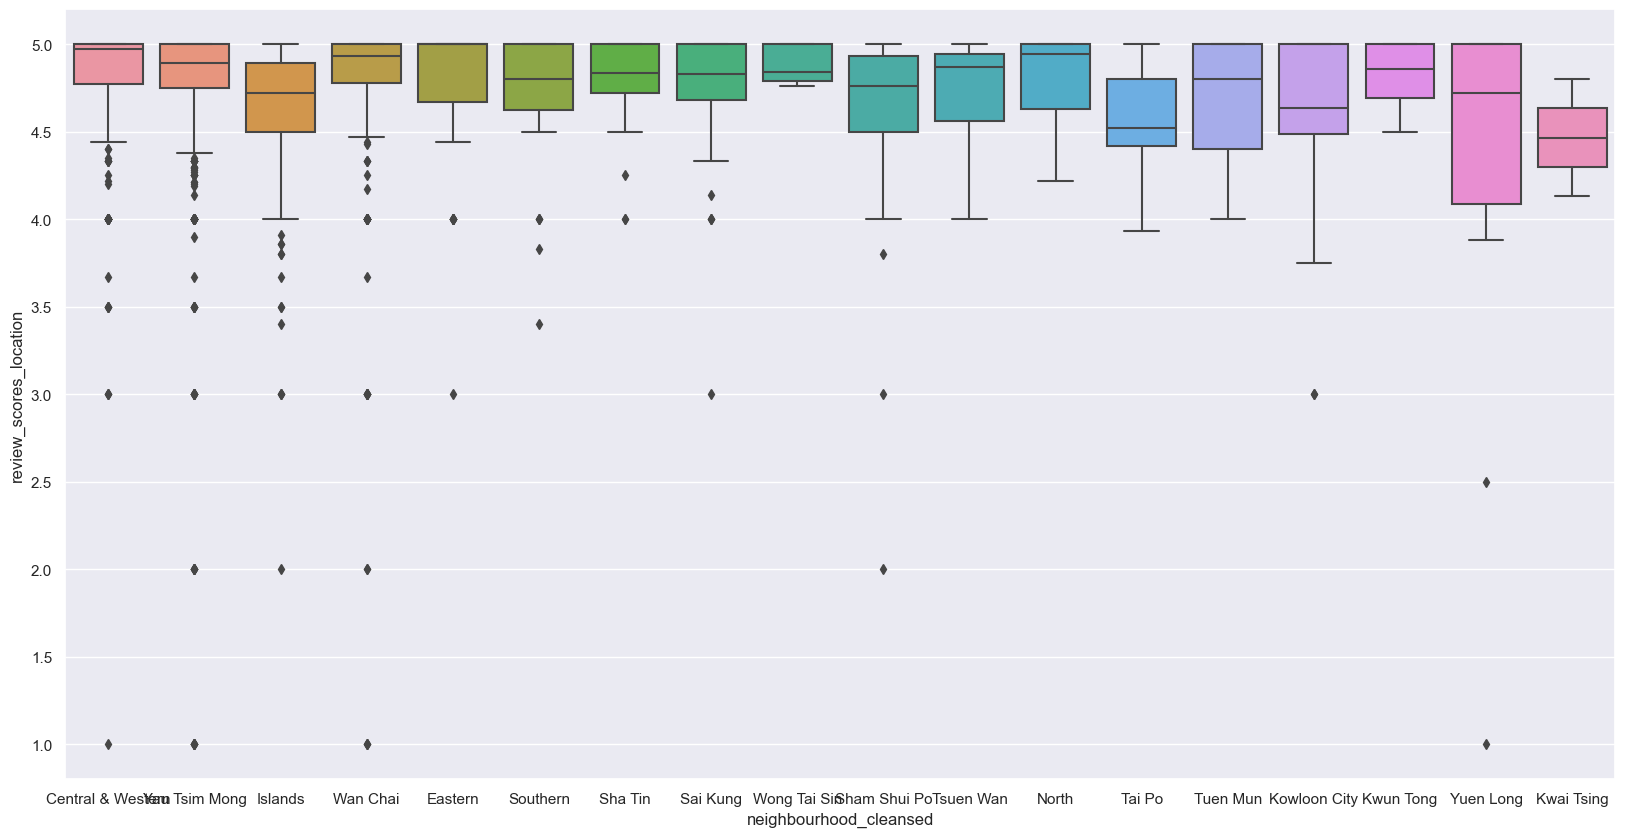

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.boxplot(x="neighbourhood_cleansed", y="review_scores_location",
            data=newdf)

From this plot, it is easily to find out that location in Wong Tai Sin, Central&Western and Kwun Tong has the relatively high mean location rating among all. While Kwai Tsing has the lowest rating. This plot is not that clear, lets see the next plot.

In [ ]:
mean_by_neig=newdf[['neighbourhood_cleansed','review_scores_location']].groupby('neighbourhood_cleansed').mean()
mean_by_neig

,review_scores_location
neighbourhood_cleansed,
Central & Western,4.796976
Eastern,4.770435
Islands,4.618939
Kowloon City,4.627195
Kwai Tsing,4.465000
Kwun Tong,4.816667
North,4.795000
Sai Kung,4.755410
Sha Tin,4.761667


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='review_scores_location'>

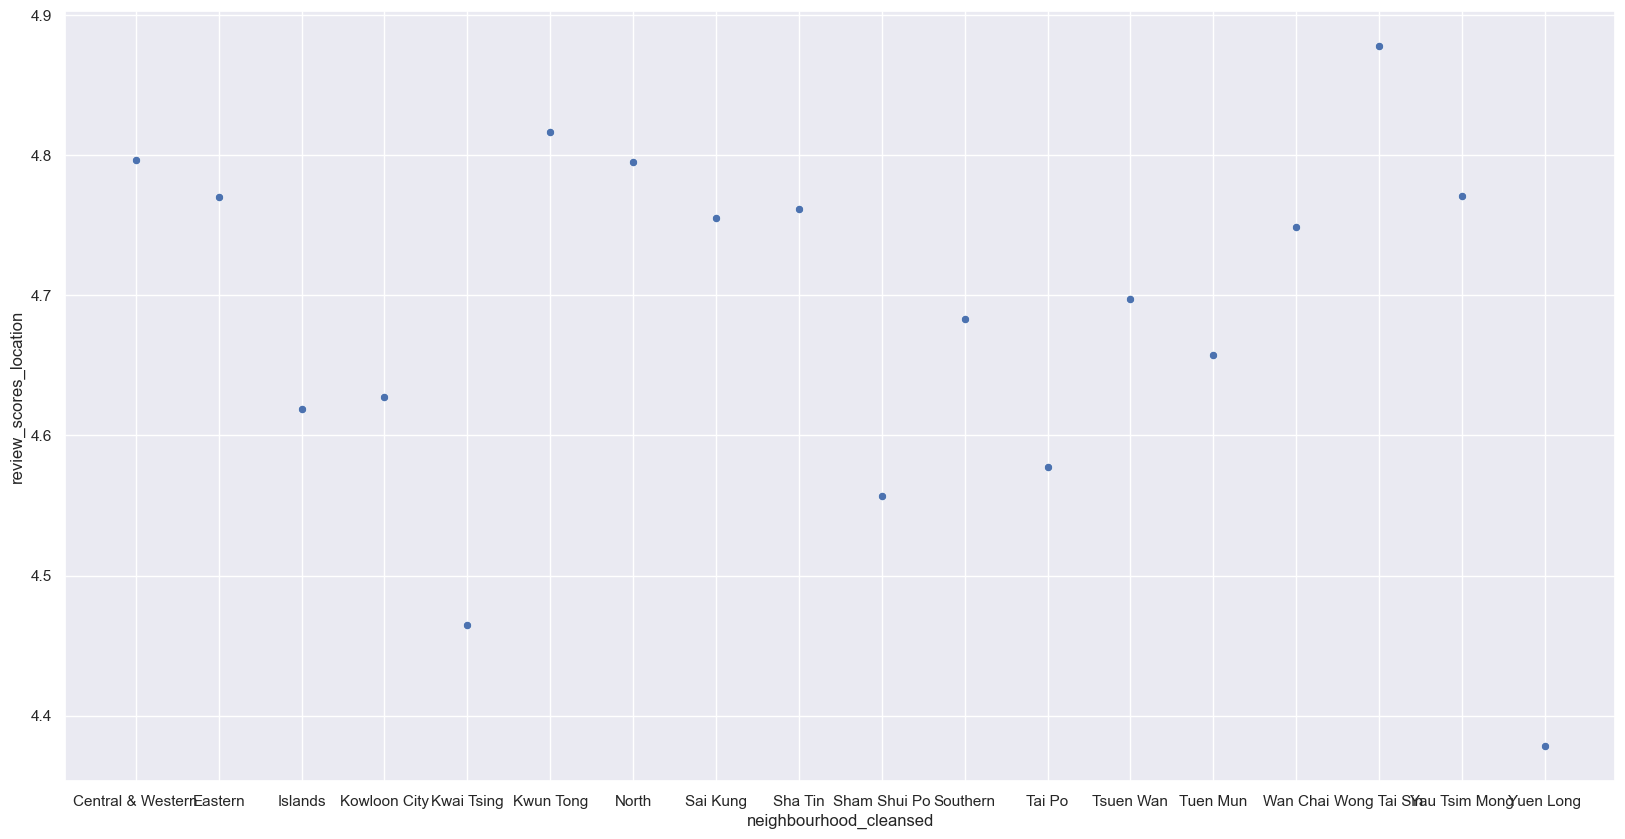

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=mean_by_neig, x="neighbourhood_cleansed", y="review_scores_location")

Now, it is easily to find out that location Wong Tai Sin has the highest mean rating, and KWai Tsing has the lowest. Next, let's find out if price is related to the location

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price_per_person'>

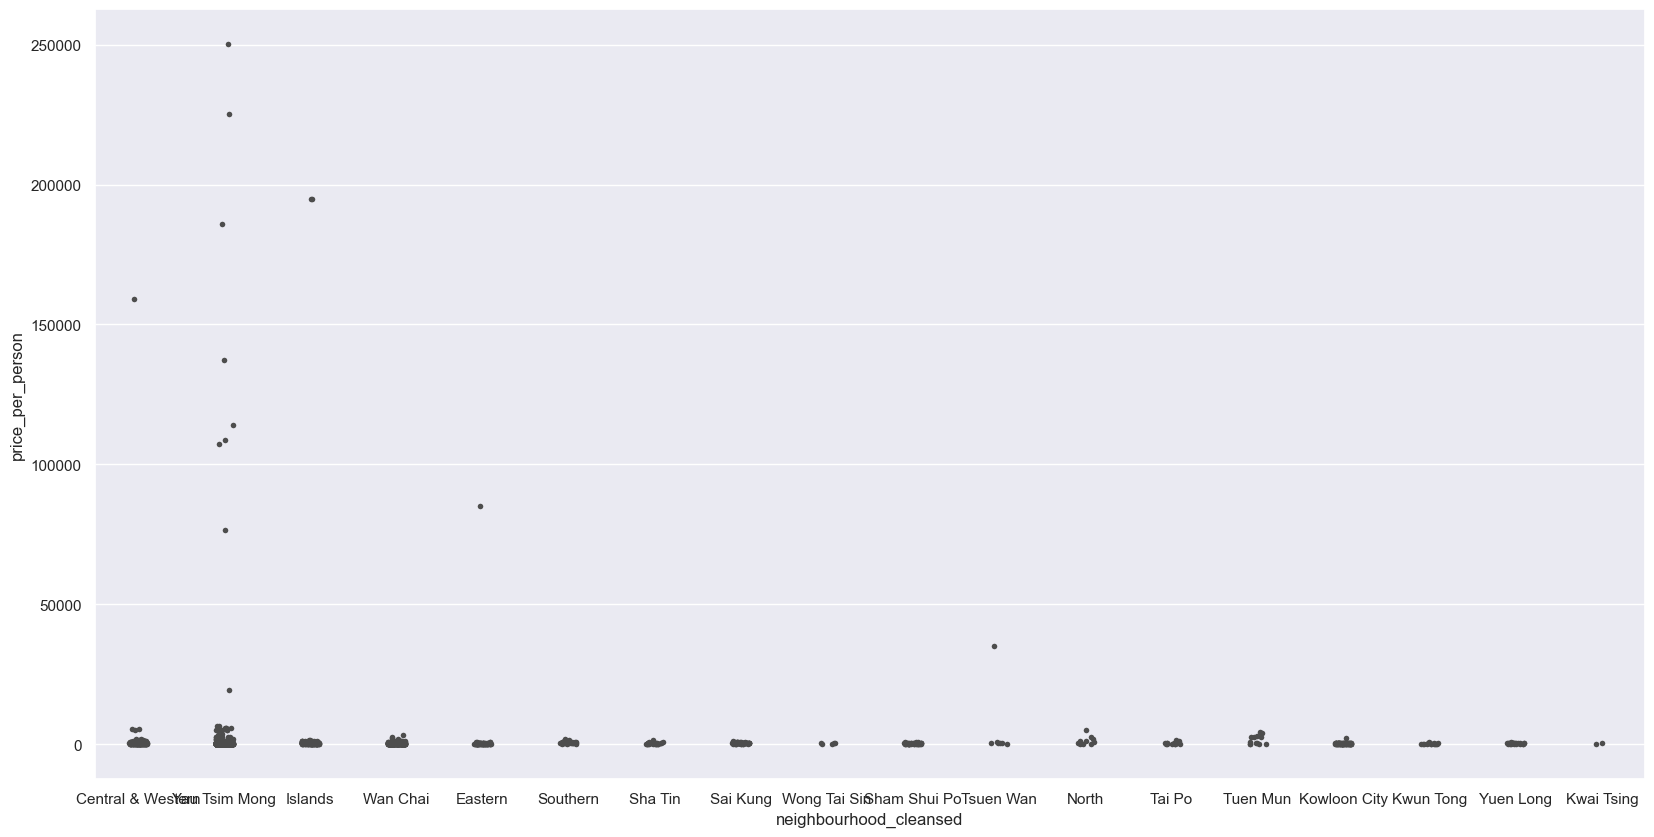

In [ ]:
plt.figure(figsize=(20, 10))
sns.stripplot(x="neighbourhood_cleansed", y="price_per_person", data=newdf,
              size=4, color=".3", linewidth=0)

There are some outstanding values there, they may affect the result, we need to first delete them.

In [ ]:
newdf=newdf.drop(newdf[newdf['price_per_person']>4000].index)
newdf =newdf.reset_index(drop=True)
newdf

,neighbourhood_cleansed,review_scores_value,review_scores_location,review_scores_rating,review_scores_accuracy,review_scores_communication,average_rating,price_per_person
0,Central & Western,4.66,4.90,4.76,4.73,4.93,4.796,466.67
1,Central & Western,4.13,4.73,4.22,4.04,4.51,4.326,288.50
2,Yau Tsim Mong,4.75,4.86,4.80,4.82,4.85,4.816,129.50
3,Central & Western,4.57,4.85,4.62,4.61,4.72,4.674,310.00
4,Central & Western,5.00,5.00,5.00,5.00,5.00,5.000,351.00
...,...,...,...,...,...,...,...,...
2477,Central & Western,5.00,5.00,5.00,5.00,5.00,5.000,282.50
2478,Yau Tsim Mong,4.28,4.56,4.35,4.50,4.64,4.466,162.33
2479,Kowloon City,5.00,4.00,4.00,4.00,4.00,4.200,217.00
2480,Yau Tsim Mong,4.00,4.00,5.00,3.00,5.00,4.200,90.00


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price_per_person'>

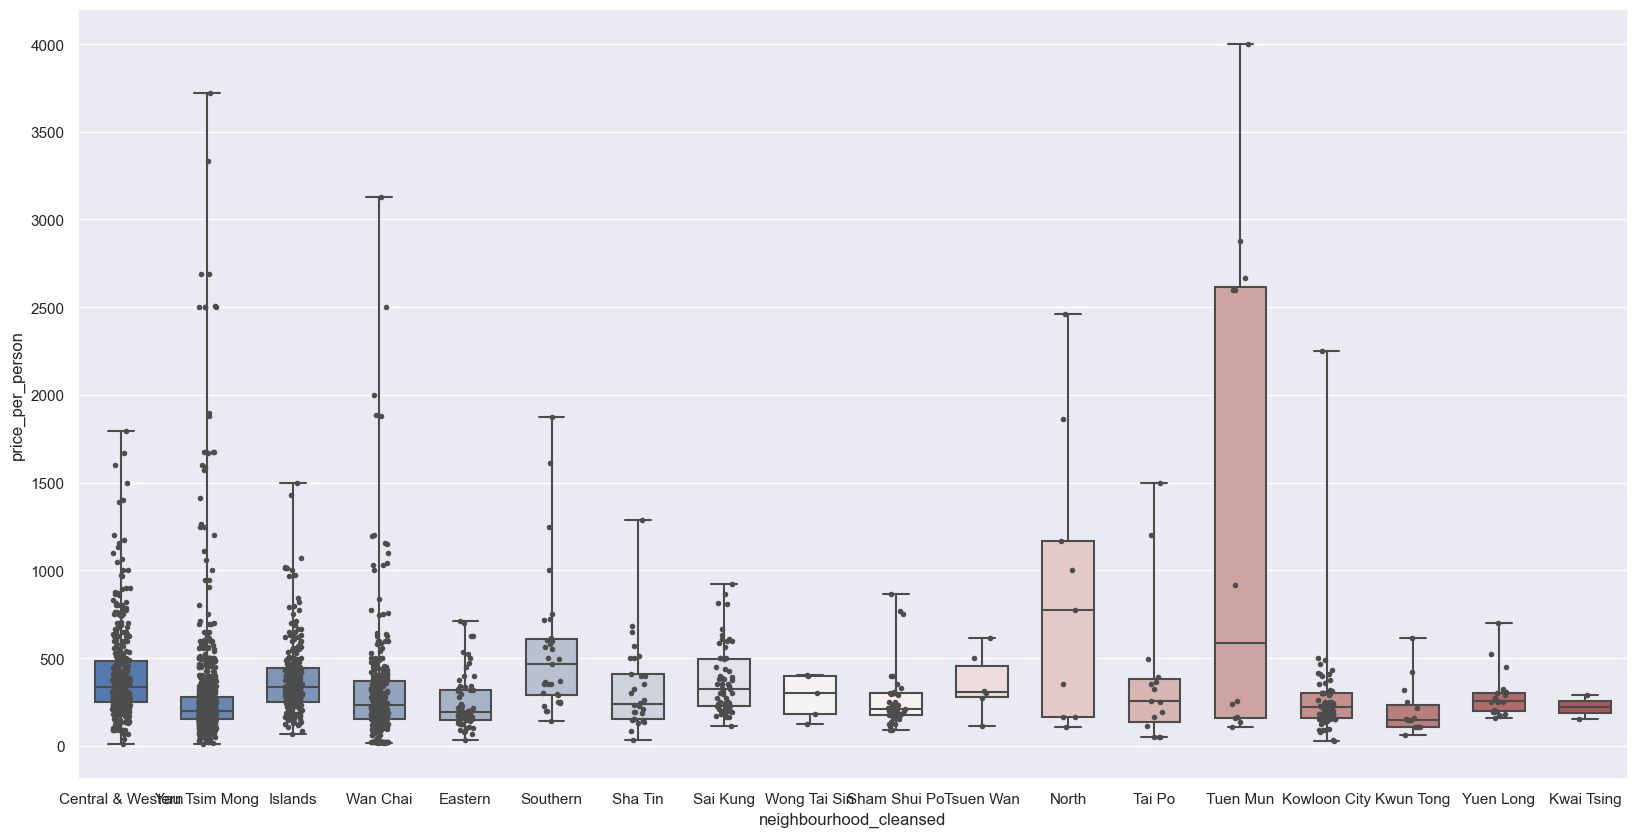

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="neighbourhood_cleansed", y="price_per_person", data=newdf,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="neighbourhood_cleansed", y="price_per_person", data=newdf,
              size=4, color=".3", linewidth=0)

From this we can see that There are quite a few airbnb rooms in Central & Western, Yeum Tsing Mong, Islands and Wan Chai. And price in Central &Western are relatively high.